Prerequisite: download ```pluto.py``` and the ```models``` folder, put them both in the same directory as this file.  
  
<pre>
/base_dir  
 |-- pluto.py
 |-- /models  
 |    |-- fbm2.pt  
 |    |-- wa1.pt  
 |     ...  
 |  
 |-- example.ipynb     <-- your are here  
</pre>  
In addition to that, you might want to download some example images from the [GitHub repo](https://github.com/Patzold/Pluto) or the [screenshots dataset](https://www.kaggle.com/patzold/screenshots-dataset).

In [ ]:
# (optional) install dependencies
!pip install numpy
!pip install matplotlib
!pip install opencv-python
!pip install pytorch
!pip install easyocr

In [1]:
import pluto as pl

Let's start by loading a screenshot and displaying it.

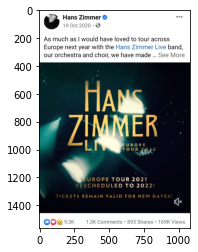

In [2]:
path = "example images/6.jpg" # This image is from the Pluto GitHub repo
img = pl.read_image(path)
pl.show_image(img)

Next, let's run the core method for the category specific feature. All features like the Facebook, New York Times or FB Messengeer one have a to_json() method. It performes the core function of Pluto, which is to extract information from a screenshot and to return it as a .json file.

In [3]:
post = pl.Facebook(img)
post.to_json()

'{"source": "Facebook", "category": "Social Media", "post": {"username": "Hans Zimmer", "date": "19 Oct 2020", "content": "As much as would have loved to tour across Europe next year with the Hans Zimmer Live band, our orchestra and choir; we have made See More", "engagement": ["893 Shares", "169K Views"]}}'

In the example above, we don't specify a specific image nor output path, so the image from the object initialization is used and the output is simply printed.

Let's perform the same action, but this time with a different image and the same object.

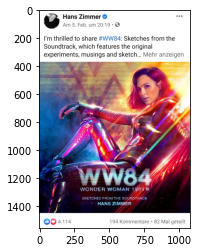

cuda


'{"source": "Facebook", "category": "Social Media", "post": {"username": "Hans Zimmer", "date": "Am 5. Feb. um 20.19", "content": "Im thrilled to share #WW84: Sketches from the Soundtrack, which features the original experiments, musings and sketch_ Mehr anzeigen", "engagement": "4.114 194 Kommentare 82 Mal geteilt"}}'

In [4]:
img2 = pl.read_image("example images/5.jpg")
pl.show_image(img2)

# check if you are running on cuda
print(post.determine_device())

post.to_json(img2)

Again, this is the basic workflow for all features in Pluto.

In [ ]:
# This is what it would look like
# pl.Facebook(img).to_json()
# pl.NYT(img).to_json()
# pl.WPost(img).to_json()
# pl.WELT(img).to_json()
# pl.Discord(img).to_json()
# pl.FBM(img).to_json()
# pl.WhatsApp(img).to_json()
# pl.Tagesschau(img).to_json()

Let's look at the New York Times feature.

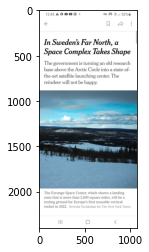

In [5]:
img = pl.read_image("example images/NYT_Example_3.jpg")
pl.show_image(img)

article = pl.NYT(img)
article.to_json(img, "NYT_3_out.json")

Check your directory. You should find a file called 'NYT_3_out.json'. But let's go a little bit further than that. What if we would like to find the original article seen in the screenshot?

In [6]:
article.open_search()